In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [254]:
train = pd.read_csv('/content/drive/My Drive/PGPDSE/Hackathon/Training Data Set.csv')
train.shape

(53515, 17)

In [255]:
test = pd.read_csv('/content/drive/My Drive/PGPDSE/Hackathon/Test Data Set.csv')
test.shape

(5615, 16)

In [256]:
df = pd.concat([train, test])
df.shape

(59130, 17)

In [257]:
df = df.reset_index(drop = True)
df

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59125,16611,skoda,octavia,Mumbai,149976.0,First,2011,8,1968,103.0,NaN,8,man,4,5,diesel,NaN
59126,16612,skoda,superb,Ahmedabad,332000.0,First,2005,14,1896,96.0,NaN,6,man,4,5,diesel,NaN
59127,16613,skoda,octavia,Bangalore,230800.0,Second,2005,14,1896,77.0,NaN,7,man,5,5,diesel,NaN
59128,16614,nissan,qashqai,Jaipur,63480.0,Third,2011,8,1997,104.0,NaN,5,man,4,7,petrol,NaN


In [258]:
id = df['Id']

In [259]:
df.drop('Id', 1, inplace = True)

In [260]:
df['Distance'] = df['Distance ']
df.drop('Distance ', 1, inplace = True)

In [261]:
df.isna().sum() / df.shape[0]

Maker                  0.000000
model                  0.000000
Location               0.000000
Owner Type             0.000000
manufacture_year       0.000000
Age of car             0.000000
engine_displacement    0.000000
engine_power           0.027177
body_type              0.922916
Vroom Audit Rating     0.000000
transmission           0.000000
door_count             0.000000
seat_count             0.000000
fuel_type              0.000000
Price                  0.094960
Distance               0.022645
dtype: float64

In [262]:
df.drop('body_type', 1, inplace = True)

In [263]:
df['Distance'].fillna(df['Distance'].median(), inplace = True)

In [264]:
df['engine_power'].fillna(df['engine_power'].median(), inplace = True)

In [265]:
df['door_count'].value_counts()

4       37391
5        8405
None     8340
2        4779
3         204
6           9
1           2
Name: door_count, dtype: int64

In [266]:
df['door_count'] = df['door_count'].replace({'None' : np.nan})
vc = df['door_count'].value_counts(normalize = True)
miss = df['door_count'].isna()
df.loc[miss, 'door_count'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)
df['door_count'] = df['door_count'].astype('int64')
df['door_count'].value_counts()

4    43484
5     9795
2     5607
3      232
6       10
1        2
Name: door_count, dtype: int64

In [267]:
 df['seat_count'].value_counts()

5       42924
None     9402
4        4922
7         934
2         804
3         117
6          23
9           2
1           1
8           1
Name: seat_count, dtype: int64

In [268]:
df['seat_count'] = df['seat_count'].replace({'None' : np.nan})
vc = df['seat_count'].value_counts(normalize = True)
miss = df['seat_count'].isna()
df.loc[miss, 'seat_count'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)
df['seat_count'] = df['seat_count'].astype('int64')
df['seat_count'].value_counts()

5    51038
4     5864
7     1103
2      961
3      133
6       26
9        3
8        1
1        1
Name: seat_count, dtype: int64

In [269]:
df.drop('manufacture_year', 1, inplace = True)

In [270]:
X = df.drop(['Price'], 1)
X.shape

(59130, 13)

In [271]:
X_dum = pd.get_dummies(X, drop_first = True)

In [272]:
VIF = [vif(X_dum.values, i) for i in range(X_dum.shape[1])]
pd.DataFrame({'vif': VIF}, index=X_dum.columns).T

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Distance,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,model_avensis,model_aygo,model_citigo,model_coupe,model_i30,model_juke,model_micra,model_octavia,model_panda,model_q3,model_q5,model_q7,model_qashqai,model_rapid,model_roomster,model_superb,model_tt,model_x1,model_x3,model_x5,model_yaris,model_yeti,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_man,fuel_type_petrol
vif,1.42388,1.164808,3.228517,1.000904,1.740001,1.751156,1.070757,inf,26.327358,12.642795,1.0491,inf,inf,38.141365,1.968736,1.98032,inf,6.927733,20.952909,inf,inf,inf,32.136188,8.52474,10.261771,8.149792,inf,inf,inf,inf,3.859698,inf,inf,inf,2.826436,inf,1.837199,1.82538,1.846027,1.828146,1.8251,1.830823,1.850314,1.833649,1.832352,1.827399,1.494702,1.49413,1.496157,1.54061,1.4947


In [273]:
X_1 = X.drop(['model'], 1)
X_1_dum = pd.get_dummies(X_1, drop_first = True)
VIF = [vif(X_1_dum.values, i) for i in range(X_1_dum.shape[1])]
pd.DataFrame({'vif': VIF}, index=X_1_dum.columns).T

,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Distance,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_man,fuel_type_petrol
vif,4.854252,3.021406,11.351451,16.753629,39.277483,62.902989,1.188577,2.121751,1.608679,1.591063,1.025488,2.440874,6.414839,3.173306,1.955355,1.936675,1.965428,1.938818,1.933098,1.946548,1.968645,1.945104,1.949478,1.945609,1.964303,1.96154,1.975964,4.36317,2.377464


In [274]:
X_1 = X.drop(['model', 'seat_count'], 1)
X_1_dum = pd.get_dummies(X_1, drop_first = True)
VIF = [vif(X_1_dum.values, i) for i in range(X_1_dum.shape[1])]
pd.DataFrame({'vif': VIF}, index=X_1_dum.columns).T

,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,Distance,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_man,fuel_type_petrol
vif,4.754627,3.009863,9.920549,15.502579,26.115235,1.188227,2.073696,1.603085,1.539437,1.024739,2.190094,6.185189,2.956726,1.91429,1.899734,1.92522,1.899784,1.89718,1.909585,1.929946,1.90564,1.909713,1.902602,1.949254,1.948311,1.962756,4.332822,2.376929


In [275]:
X_1 = X.drop(['model', 'seat_count', 'door_count'], 1)
X_1_dum = pd.get_dummies(X_1, drop_first = True)
VIF = [vif(X_1_dum.values, i) for i in range(X_1_dum.shape[1])]
pd.DataFrame({'vif': VIF}, index=X_1_dum.columns).T

,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Distance,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_man,fuel_type_petrol
vif,4.752272,2.994087,8.313402,14.05779,1.188168,1.861666,1.445943,1.391008,1.019309,1.89857,4.298661,2.436313,1.866063,1.855063,1.876377,1.853494,1.853579,1.862714,1.883185,1.858943,1.865897,1.859213,1.931377,1.930515,1.943468,4.258845,2.337472


In [276]:
X_1 = X.drop(['model', 'seat_count', 'door_count', 'Vroom Audit Rating'], 1)
X_1_dum = pd.get_dummies(X_1, drop_first = True)
VIF = [vif(X_1_dum.values, i) for i in range(X_1_dum.shape[1])]
pd.DataFrame({'vif': VIF}, index=X_1_dum.columns).T

,Age of car,engine_displacement,engine_power,Distance,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_man,fuel_type_petrol
vif,4.71434,2.987257,6.703839,1.187746,1.799601,1.382009,1.342395,1.018465,1.767288,3.838952,2.22666,1.805081,1.793272,1.816897,1.794975,1.799197,1.805804,1.826639,1.803799,1.808834,1.802309,1.913893,1.911768,1.92583,4.138784,2.326379


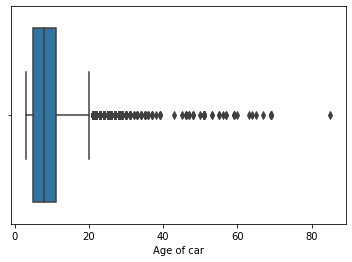

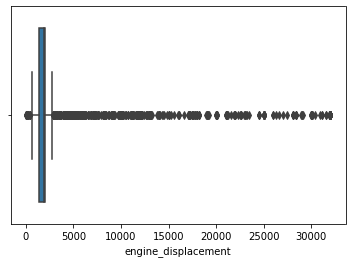

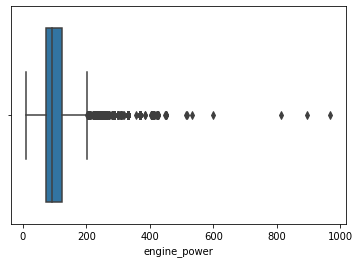

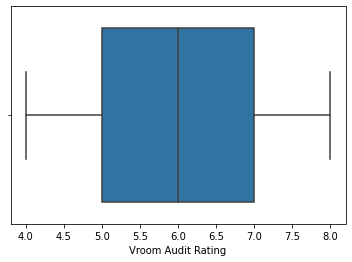

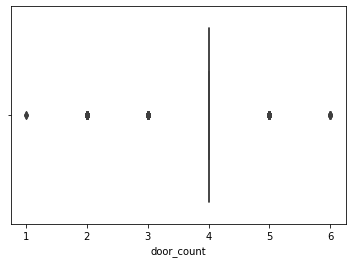

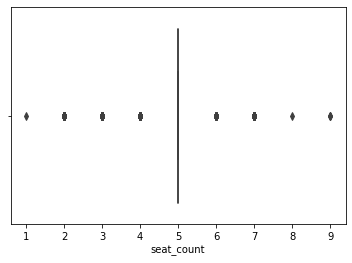

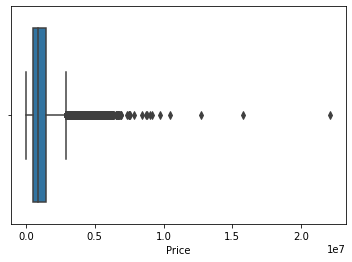

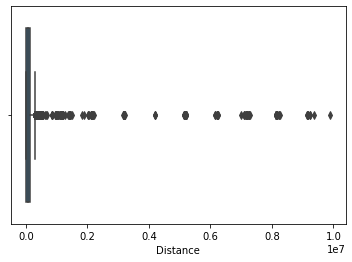

In [277]:
num = df.select_dtypes(exclude = 'O').columns
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [278]:
df.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'transmission', 'door_count', 'seat_count', 'fuel_type', 'Price',
       'Distance'],
      dtype='object')

In [279]:
df.columns = ['maker', 'model', 'location', 'owner_type', 'age', 'engine_displacement',
       'engine_power', 'rating', 'transmission', 'door_count', 'seat_count', 'fuel_type',
       'price', 'distance']

In [280]:
df.head()

,maker,model,location,owner_type,age,engine_displacement,engine_power,rating,transmission,door_count,seat_count,fuel_type,price,distance
0,skoda,octavia,Ahmedabad,Second,55,1964,147.0,8,man,2,5,petrol,543764.25,65300.0
1,fiat,panda,Ahmedabad,Third,7,1242,51.0,6,man,4,4,petrol,401819.25,27750.0
2,bmw,x1,Hyderabad,Third,5,1995,105.0,7,auto,4,5,diesel,2392855.50,46000.0
3,nissan,juke,Mumbai,Third,8,1618,140.0,7,man,4,5,petrol,958606.50,43949.0
4,bmw,x5,Jaipur,Fourth & Above,7,2993,180.0,7,auto,4,5,diesel,3085561.50,59524.0


In [281]:
df.reset_index(drop = True, inplace = True)

In [282]:
df[df['price'].isnull()]

,maker,model,location,owner_type,age,engine_displacement,engine_power,rating,transmission,door_count,seat_count,fuel_type,price,distance
53515,skoda,octavia,Mumbai,First,12,1595,75.0,5,man,4,5,petrol,NaN,150000.0
53516,skoda,rapid,Coimbatore,Third,5,1598,77.0,4,man,4,5,diesel,NaN,29376.0
53517,skoda,octavia,Coimbatore,Second,5,1968,110.0,5,man,5,5,diesel,NaN,30563.0
53518,audi,q3,Delhi,Fourth & Above,4,1968,110.0,8,auto,4,5,diesel,NaN,8650.0
53519,audi,tt,Chennai,Third,4,1984,169.0,4,auto,2,5,petrol,NaN,6400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59125,skoda,octavia,Mumbai,First,8,1968,103.0,8,man,4,5,diesel,NaN,149976.0
59126,skoda,superb,Ahmedabad,First,14,1896,96.0,6,man,4,5,diesel,NaN,332000.0
59127,skoda,octavia,Bangalore,Second,14,1896,77.0,7,man,5,5,diesel,NaN,230800.0
59128,nissan,qashqai,Jaipur,Third,8,1997,104.0,5,man,4,7,petrol,NaN,63480.0


In [283]:
X = df.drop('price', 1)
y = df['price']
X_train = X[:53515]
y_train = y[:53515]
X_test = X[53515:]
y_test = y[53515:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53515, 13), (53515,), (5615, 13), (5615,))

In [284]:
num = ['age', 'engine_displacement',
       'engine_power', 'rating', 'door_count', 'seat_count', 'distance']

In [285]:
for i in num:
    print(X_train[i].skew(), X_test[i].skew())

1.9125557321371436 2.151668535955962
12.730459629497304 13.087955583034667
1.7912304691708218 2.719814064126615
0.0049910074172671666 0.005117383792680339
-1.3510838649868688 -1.3805153296504695
-1.6123259271669041 -1.888513431992152
23.6028344559942 21.340080923951337


In [286]:
tran = ['age', 'engine_displacement',
       'engine_power', 'door_count', 'seat_count', 'distance']

In [287]:
pt = PowerTransformer()
X_train[tran] = pt.fit_transform(X_train[tran])
X_test[tran] = pt.transform(X_test[tran])
for i in num:
    print(X_train[i].skew(), X_test[i].skew())

0.06116264135204408 0.11668922757025084
-0.5373946116887601 0.19327299999902287
0.0371132119835988 0.08618424627234243
0.0049910074172671666 0.005117383792680339
0.06664592590606265 0.08358575118816297
0.7950575875105326 0.4747226032818689
-0.18013216696249706 -0.0767746475452153


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [288]:
X_train.head()

,maker,model,location,owner_type,age,engine_displacement,engine_power,rating,transmission,door_count,seat_count,fuel_type,distance
0,skoda,octavia,Ahmedabad,Second,3.118585,0.393766,1.114821,8,man,-2.131796,0.156274,petrol,0.217529
1,fiat,panda,Ahmedabad,Third,-0.101184,-0.989274,-1.332384,6,man,-0.126978,-1.588186,petrol,-0.279840
2,bmw,x1,Hyderabad,Third,-0.827254,0.437810,0.284840,7,auto,-0.126978,0.156274,diesel,-0.000941
3,nissan,juke,Mumbai,Third,0.172800,-0.168405,0.991314,7,man,-0.126978,0.156274,petrol,-0.027803
4,bmw,x5,Jaipur,Fourth & Above,-0.101184,1.510520,1.639240,7,auto,-0.126978,0.156274,diesel,0.157628


In [290]:
ss = StandardScaler()
X_train[num] = ss.fit_transform(X_train[num])
X_test[num] = ss.transform(X_test[num])
X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,maker,model,location,owner_type,age,engine_displacement,engine_power,rating,transmission,door_count,seat_count,fuel_type,distance
0,skoda,octavia,Ahmedabad,Second,3.118585,0.393766,1.114821,1.411263,man,-2.131796,0.156274,petrol,0.217529
1,fiat,panda,Ahmedabad,Third,-0.101184,-0.989274,-1.332384,0.001146,man,-0.126978,-1.588186,petrol,-0.279840
2,bmw,x1,Hyderabad,Third,-0.827254,0.437810,0.284840,0.706204,auto,-0.126978,0.156274,diesel,-0.000941
3,nissan,juke,Mumbai,Third,0.172800,-0.168405,0.991314,0.706204,man,-0.126978,0.156274,petrol,-0.027803
4,bmw,x5,Jaipur,Fourth & Above,-0.101184,1.510520,1.639240,0.706204,auto,-0.126978,0.156274,diesel,0.157628


In [291]:
X_train_dum = pd.get_dummies(X_train, drop_first = True)
X_test_dum = pd.get_dummies(X_test, drop_first = True)
X_train_dum.shape, X_test_dum.shape

((53515, 51), (5615, 51))

In [292]:
lr = LinearRegression()
lr.fit(X_train_dum, y_train)
y_train_pred = lr.predict(X_train_dum)
y_test_pred = lr.predict(X_test_dum)

In [293]:
np.sqrt(mean_squared_error(y_train, y_train_pred)), r2_score(y_train, y_train_pred)

(401457.0312303136, 0.7738272474848716)

In [294]:
rfr = RandomForestRegressor(random_state = 0)

In [295]:
rfr.fit(X_train_dum, y_train)
y_train_pred = rfr.predict(X_train_dum)
y_test_pred = rfr.predict(X_test_dum)
np.sqrt(mean_squared_error(y_train, y_train_pred)), r2_score(y_train, y_train_pred)

(88035.86570376, 0.9891236938301857)

In [296]:
sorted(zip(rfr.feature_importances_, X_train_dum.columns))

[(2.4133387485212784e-05, 'maker_maserati'),
 (3.219948532414523e-05, 'model_citigo'),
 (4.6259030185375526e-05, 'model_micra'),
 (4.728583471027111e-05, 'model_aygo'),
 (6.177052637866966e-05, 'model_panda'),
 (7.495264255429315e-05, 'model_roomster'),
 (0.00011766004141377163, 'maker_fiat'),
 (0.00015018070571019013, 'model_avensis'),
 (0.0002443426112845851, 'model_yaris'),
 (0.00026907831771029033, 'model_rapid'),
 (0.00031358174606350525, 'model_juke'),
 (0.0003295509009372737, 'model_i30'),
 (0.0003961769690974615, 'maker_hyundai'),
 (0.0004959851488193258, 'maker_toyota'),
 (0.0005656388790346987, 'maker_nissan'),
 (0.0006079391974022407, 'model_yeti'),
 (0.0007005843525500099, 'location_Kolkata'),
 (0.0007409304883886521, 'model_tt'),
 (0.0007667577632645002, 'location_Bangalore'),
 (0.0007842322367505499, 'location_Hyderabad'),
 (0.0008029158143266454, 'location_Mumbai'),
 (0.000860413489478994, 'location_Chennai'),
 (0.0010064374212415035, 'model_coupe'),
 (0.0010778115759458

In [ ]:
rfr = RandomForestRegressor(random_state = 0)
params = {'n_estimators' : sp_randint(50, 200),
         'max_features' : sp_randint(1, 19),
         'max_depth' : sp_randint(2, 50),
         'min_samples_leaf' : sp_randint(1, 25),
         'min_samples_split' : sp_randint(2, 25),
         'oob_score' : [False, True]}
rsearch = RandomizedSearchCV(rfr, param_distributions=params, cv = 5, n_jobs = -1, random_state = 0, n_iter = 50)
rsearch.fit(X_train_dum, y_train)
rsearch.best_params_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
rfr = RandomForestRegressor(**rsearch.best_params_, random_state = 0)
rfr.fit(X_train, y_train)
rfr.score(X_train, y_train)

In [ ]:
y_test_pred = rfr.predict(X_test)

In [ ]:
sub = pd.read_csv('/content/drive/My Drive/PGPDSE/Hackathon/Sample Submission-1.csv')
sub.head()

In [ ]:
sub['Price'] = y_test_pred

In [ ]:
sub.head()

In [ ]:
sub.to_csv('submit_3.csv', index = False)